> **Tip**: Welcome to the Investigate No Show appointments project!

# Project: Investigate No Show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [2]:
# import statements for all of the needed packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 'magic word' so that visualizations are plotted inline with the notebook.
# See this page for more:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# view sample
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# view data types and other info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# view daya description
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Detect if there is any missing values
df.isna().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [7]:
df.shape

(110527, 14)

### Data Cleaning TODO
- Drop rows with age < 0
- Rename No-show, SMS_received to NoShow, SMSReceived
- Change SMS_Recieved to NoSMSRecieved as it's more appropriate for our approach
- ScheduledDay, AppointmentDay: should be converted to date (time not important, interested in day date only)
- Drop rows with AppointmentDay before ScheduledDay

### Data Cleaning

In [8]:
# drop rows with age < 0
df = df[df['Age'] > 0]

In [9]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Dropping duplicated rows if there
df.drop_duplicates(inplace=True)
df.shape

(106987, 14)

In [11]:
# rename No-show, SMS_received to NoShow, SMSReceived
df.rename(columns={'No-show': 'NoShow', 'SMS_received':'SMSReceived'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# convert ScheduledDay, AppointmentDay to date

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date


In [13]:
# drop rows with AppointmentDay before ScheduledDay
df = df[df['ScheduledDay'] <= df['AppointmentDay']]
df.shape

(106982, 14)

In [14]:
# convert No-show to int (Yes: 1, No: 0)
df['NoShow'] = (df['NoShow'] == 'Yes').astype(int)

In [15]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0
110526,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,0


In [16]:
# check types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106982 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106982 non-null  float64
 1   AppointmentID   106982 non-null  int64  
 2   Gender          106982 non-null  object 
 3   ScheduledDay    106982 non-null  object 
 4   AppointmentDay  106982 non-null  object 
 5   Age             106982 non-null  int64  
 6   Neighbourhood   106982 non-null  object 
 7   Scholarship     106982 non-null  int64  
 8   Hipertension    106982 non-null  int64  
 9   Diabetes        106982 non-null  int64  
 10  Alcoholism      106982 non-null  int64  
 11  Handcap         106982 non-null  int64  
 12  SMSReceived     106982 non-null  int64  
 13  NoShow          106982 non-null  int32  
dtypes: float64(1), int32(1), int64(8), object(4)
memory usage: 11.8+ MB


In [17]:
# preview data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


### Exploratory Data Analysis I TODO
- Age vs No Show
- Gender vs No Show
- SMSRecieved vs No Show
- Hipertension, Diabetes, Alcoholism, Handcap vs No Show

<a id='eda'></a>
## Exploratory Data Analysis
### Is there a relation between Age and No Show?

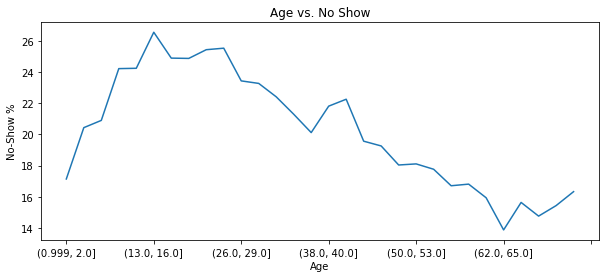

Age
(0.999, 2.0]     17.142123
(2.0, 5.0]       20.437108
(5.0, 7.0]       20.902613
(7.0, 10.0]      24.226044
(10.0, 13.0]     24.247788
(13.0, 16.0]     26.561244
(16.0, 18.0]     24.899866
(18.0, 21.0]     24.881570
(21.0, 23.0]     25.440529
(23.0, 26.0]     25.537983
(26.0, 29.0]     23.438978
(29.0, 31.0]     23.277027
(31.0, 33.0]     22.416639
(33.0, 36.0]     21.297948
(36.0, 38.0]     20.120215
(38.0, 40.0]     21.817563
(40.0, 43.0]     22.261484
(43.0, 46.0]     19.568182
(46.0, 48.0]     19.262442
(48.0, 50.0]     18.039816
(50.0, 53.0]     18.110395
(53.0, 55.0]     17.766497
(55.0, 57.0]     16.707844
(57.0, 59.0]     16.812156
(59.0, 62.0]     15.937039
(62.0, 65.0]     13.872832
(65.0, 68.0]     15.636822
(68.0, 73.0]     14.759120
(73.0, 79.0]     15.433071
(79.0, 115.0]    16.329566
Name: NoShow, dtype: float64

In [18]:
all_cases = df.groupby(pd.qcut(df["Age"], q=30, duplicates='drop'))['NoShow'].count()
no_show_cases = df.groupby(pd.qcut(df["Age"], q=30, duplicates='drop'))['NoShow'].sum()
percentage_cases = no_show_cases / all_cases * 100
percentage_cases.plot(figsize=(10,4))
plt.ylabel('No-Show %')
plt.title('Age vs. No Show')
plt.show()
percentage_cases

>There is a semi-inversely relation between age and No-Show, it's obvious that younger people tend more to No-Show  

### Is there a relation between Gender and No Show?

Gender
F    20.355131
M    20.080289
Name: NoShow, dtype: float64


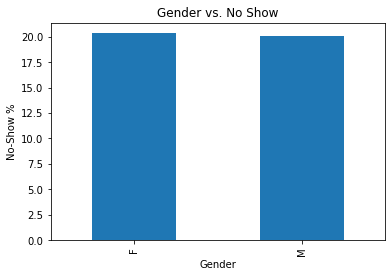

In [19]:
gender_cases = df.groupby('Gender')['NoShow']
percentage_cases = gender_cases.sum() / gender_cases.count() * 100
print(percentage_cases)
percentage_cases.plot(kind='bar')
plt.ylabel('No-Show %')
plt.title('Gender vs. No Show')
plt.show()

>There is no relation between Gender and No-Show  

### Is there a relation between SMS Receiving and No Show?


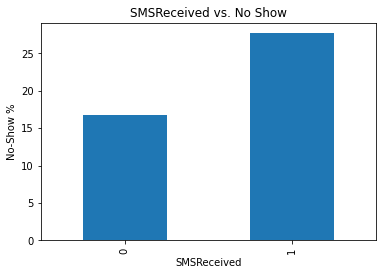

In [20]:
sms_cases = df.groupby('SMSReceived')['NoShow']

percentage_cases = sms_cases.sum() / sms_cases.count() * 100
percentage_cases.plot(kind='bar')
plt.ylabel('No-Show %')
plt.title('SMSReceived vs. No Show')
plt.show()

> This result is weired, we need to investigate SMS received more

#### Idea: Study between dates and sms, noshow

In [21]:
# calculating the gap between ScheduledDay and AppointmentDay
df['GapDays'] = df['AppointmentDay'] - df['ScheduledDay']
df['GapDays'] = df['GapDays'].dt.days
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow,GapDays
110522,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,35
110523,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,35
110524,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,41
110525,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,41
110526,3.775115e+14,5629448,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,0,41


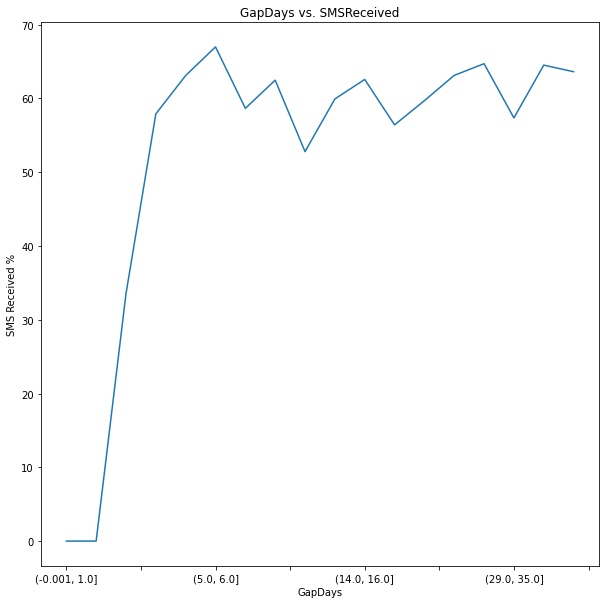

GapDays
(-0.001, 1.0]     0.000000
(1.0, 2.0]        0.000000
(2.0, 3.0]       33.535430
(3.0, 4.0]       57.904835
(4.0, 5.0]       63.110138
(5.0, 6.0]       66.987342
(6.0, 7.0]       58.662487
(7.0, 9.0]       62.477040
(9.0, 12.0]      52.795762
(12.0, 14.0]     59.932356
(14.0, 16.0]     62.578370
(16.0, 19.0]     56.421870
(19.0, 22.0]     59.700760
(22.0, 27.0]     63.129545
(27.0, 29.0]     64.710309
(29.0, 35.0]     57.359307
(35.0, 47.0]     64.520502
(47.0, 179.0]    63.623516
Name: SMSReceived, dtype: float64

In [43]:
cases = df.groupby(pd.qcut(df["GapDays"], q=30, duplicates='drop'))['SMSReceived']
percentage_cases = cases.sum() / cases.count() * 100
percentage_cases.plot(figsize=(10,10))
plt.ylabel('SMS Received %')
plt.title('GapDays vs. SMSReceived')
plt.show()
percentage_cases

> I can conclude that no sms is recieved when gap days are less than 3 days
>> I think to study the relation between no-show & sms it's better to exclude rows with gap days < 3

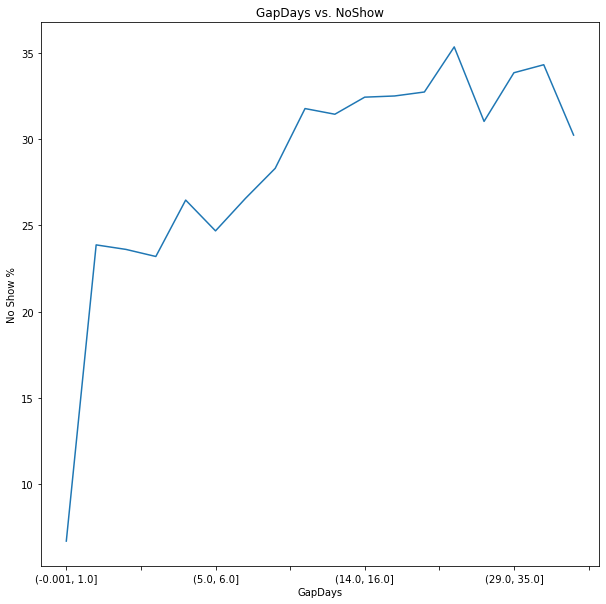

GapDays
(-0.001, 1.0]     6.675833
(1.0, 2.0]       23.869801
(2.0, 3.0]       23.607427
(3.0, 4.0]       23.196470
(4.0, 5.0]       26.470588
(5.0, 6.0]       24.683544
(6.0, 7.0]       26.562173
(7.0, 9.0]       28.312779
(9.0, 12.0]      31.783402
(12.0, 14.0]     31.454340
(14.0, 16.0]     32.445141
(16.0, 19.0]     32.513750
(19.0, 22.0]     32.744665
(22.0, 27.0]     35.362241
(27.0, 29.0]     31.038375
(29.0, 35.0]     33.862434
(35.0, 47.0]     34.327347
(47.0, 179.0]    30.243075
Name: NoShow, dtype: float64

In [45]:
cases = df.groupby(pd.qcut(df["GapDays"], q=30, duplicates='drop'))['NoShow']
percentage_cases = cases.sum() / cases.count() * 100
percentage_cases.plot(figsize=(10,10))
plt.ylabel('No Show %')
plt.title('GapDays vs. NoShow')
plt.show()
percentage_cases

> Direct relation between GapDays & NoShow

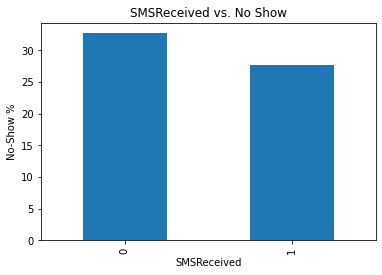

In [35]:
sms_cases = df_moreGapDays.groupby('SMSReceived')['NoShow']

percentage_cases = sms_cases.sum() / sms_cases.count() * 100
percentage_cases.plot(kind='bar')
plt.ylabel('No-Show %')
plt.title('SMSReceived vs. No Show')
plt.show()

In [ ]:
sms_cases = df_moreGapDays.groupby('GapDays')['NoShow']

percentage_cases = sms_cases.sum() / sms_cases.count() * 100
percentage_cases.plot(kind='bar')
plt.ylabel('No-Show %')
plt.title('SMSReceived vs. No Show')
plt.show()

> It make sense now, we can say that hospitals have policies that no sms send when gapdays < 3

### Investigate relation between No Show and different factors

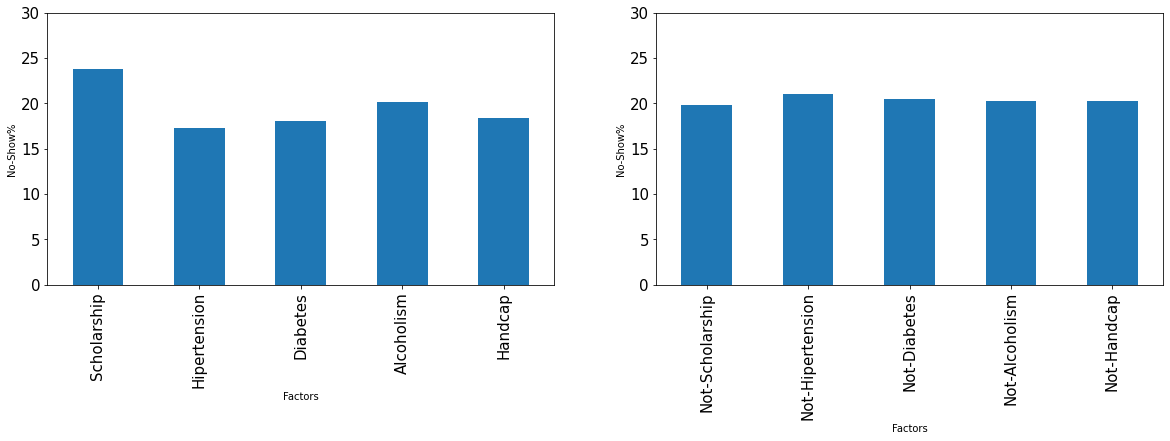

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2)


df_noshow = df[df['NoShow'] == 1]
factors_cases = df_noshow[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']].sum()
all_cases = df[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']].sum()
percentage_cases = factors_cases / all_cases * 100

percentage_cases.plot(kind='bar', ax=axes[0], figsize=(20,5), fontsize=15);

axes[0].set_ylabel('No-Show%')
axes[0].set_xlabel('Factors')
axes[0].set_ylim([0,30]);


df_noshow = df[df['NoShow'] == 1]
factors_cases = (df_noshow[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']]==0).sum()
all_cases = (df[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',]]==0).sum()
percentage_cases = factors_cases / all_cases * 100

percentage_cases.plot(kind='bar', ax=axes[1], figsize=(20,5), fontsize=15)

labels=['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap']
inverse_labels=['Not-Scholarship','Not-Hipertension','Not-Diabetes','Not-Alcoholism','Not-Handcap']

plt.xticks(ticks=[0,1,2,3,4],labels='Not-'+percentage_cases.keys())
axes[1].set_ylabel('No-Show%')
axes[1].set_xlabel('Factors')
axes[1].set_ylim([0,30])
plt.show()

> We can't say much here, but: 
>- people with illness like diabetes and hipertension tend less to no-show
>- also people with scolarships tend more to no-show!

### Relation between Age and other factors

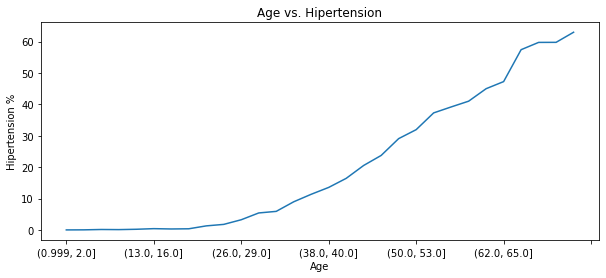

In [27]:
all_cases = df.groupby(pd.qcut(df["Age"], q=30, duplicates='drop'))['Hipertension'].count()
no_show_cases = df.groupby(pd.qcut(df["Age"], q=30, duplicates='drop'))['Hipertension'].sum()
percentage_cases = no_show_cases / all_cases * 100
percentage_cases.plot(figsize=(10,4))
plt.ylabel('Hipertension %')
plt.title('Age vs. Hipertension')
plt.show()

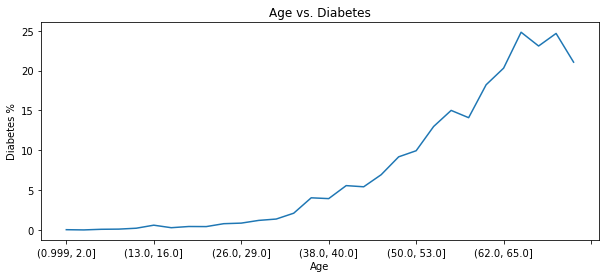

In [28]:
all_cases = df.groupby(pd.qcut(df["Age"], q=30, duplicates='drop'))['Diabetes'].count()
no_show_cases = df.groupby(pd.qcut(df["Age"], q=30, duplicates='drop'))['Diabetes'].sum()
percentage_cases = no_show_cases / all_cases * 100
percentage_cases.plot(figsize=(10,4))
plt.ylabel('Diabetes %')
plt.title('Age vs. Diabetes')
plt.show()

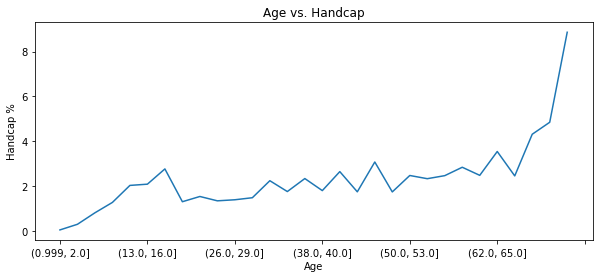

In [29]:
all_cases = df.groupby(pd.qcut(df["Age"], q=30, duplicates='drop'))['Handcap'].count()
no_show_cases = df.groupby(pd.qcut(df["Age"], q=30, duplicates='drop'))['Handcap'].sum()
percentage_cases = no_show_cases / all_cases * 100
percentage_cases.plot(figsize=(10,4))
plt.ylabel('Handcap %')
plt.title('Age vs. Handcap')
plt.show()

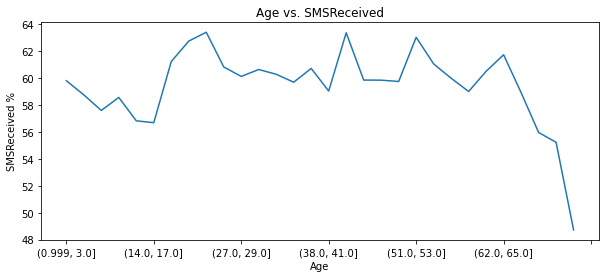

Age
(0.999, 3.0]     59.806933
(3.0, 6.0]       58.753709
(6.0, 8.0]       57.594937
(8.0, 11.0]      58.561485
(11.0, 14.0]     56.823266
(14.0, 17.0]     56.685769
(17.0, 19.0]     61.229773
(19.0, 22.0]     62.745098
(22.0, 24.0]     63.404549
(24.0, 27.0]     60.825200
(27.0, 29.0]     60.123457
(29.0, 32.0]     60.635793
(32.0, 34.0]     60.282852
(34.0, 36.0]     59.692308
(36.0, 38.0]     60.716383
(38.0, 41.0]     59.037657
(41.0, 43.0]     63.367003
(43.0, 46.0]     59.851787
(46.0, 49.0]     59.843814
(49.0, 51.0]     59.747392
(51.0, 53.0]     63.030303
(53.0, 55.0]     61.052632
(55.0, 57.0]     59.988870
(57.0, 59.0]     59.002933
(59.0, 62.0]     60.505667
(62.0, 65.0]     61.732673
(65.0, 68.0]     58.918618
(68.0, 73.0]     55.959079
(73.0, 79.0]     55.227273
(79.0, 115.0]    48.719376
Name: SMSReceived, dtype: float64

In [250]:
df_moreGapDays = df.query('GapDays >= 3') # as no sms send at gapdays < 3
all_cases = df_moreGapDays.groupby(pd.qcut(df_moreGapDays["Age"], q=30, duplicates='drop'))['SMSReceived'].count()
no_show_cases = df_moreGapDays.groupby(pd.qcut(df_moreGapDays["Age"], q=30, duplicates='drop'))['SMSReceived'].sum()
percentage_cases = no_show_cases / all_cases * 100
percentage_cases.plot(figsize=(10,4))
plt.ylabel('SMSReceived %')
plt.title('Age vs. SMSReceived')
plt.show()
percentage_cases

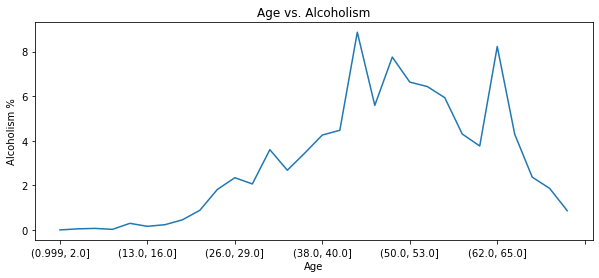

In [64]:
all_cases = df.groupby(pd.qcut(df["Age"], q=30, duplicates='drop'))['Alcoholism'].count()
no_show_cases = df.groupby(pd.qcut(df["Age"], q=30, duplicates='drop'))['Alcoholism'].sum()
percentage_cases = no_show_cases / all_cases * 100
percentage_cases.plot(figsize=(10,4))
plt.ylabel('Alcoholism %')
plt.title('Age vs. Alcoholism')
plt.show()

> Diabatic and Hipertension probability increase with Age

### study of people with scolarship

#### relation between age and scholarship

Text(0.5, 1.0, 'Age vs. Scholarship')

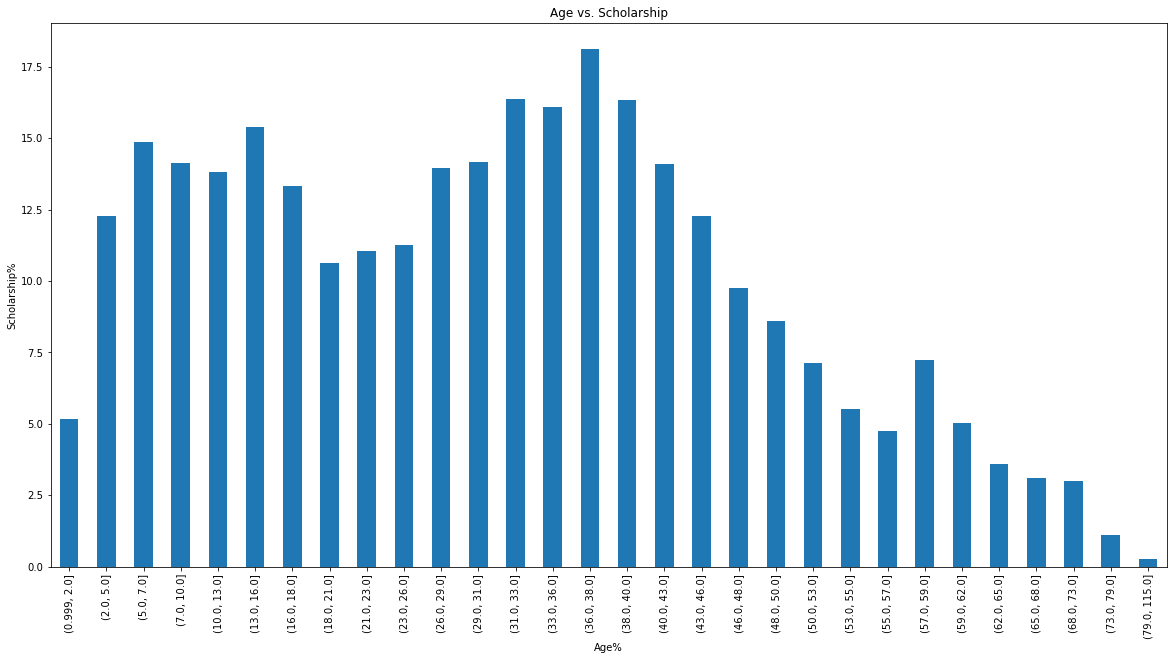

In [55]:
# df.query('Scholarship==1 and NoSMSReceived==1').count()
cases = df.groupby(pd.qcut(df["Age"], q=30, duplicates='drop'))['Scholarship']
percentage_cases = cases.sum()/cases.count() * 100
percentage_cases.plot(kind='bar', figsize=(20,10))
plt.ylabel('Scholarship%')
plt.xlabel('Age')
plt.title('Age vs. Scholarship')

### Now we can finalize our study with three factors: Age, Scholarship, GapDays

In [243]:
def evaluate_best(query_str, x_min, x_max, return_value=0, limit=1000):
    max_out = 0
    for i in range(x_min, x_max+1):

        df_q=df.query(query_str)['NoShow']

        noshow = df_q.sum()
        both = df_q.count()

        if  both < 1:
            continue
        current = round(noshow / both * 100)
        if current >= max_out and both >= limit:
            return_value = i
            max_out = current
    return max_out, return_value
        

In [255]:
Age_min = df['Age'].min()
Age_max = df['Age'].max()
GapDays_min = df['GapDays'].min()
GapDays_max = df['GapDays'].max()
limit = df[df['Scholarship']==1 ].shape[0] * 20 // 100
q = 'Scholarship==1 and  @GapDays_min < GapDays < @GapDays_max and  @i < Age < @Age_max'
max_out, Age_min = evaluate_best(q, Age_min, Age_max, Age_min, limit)
print(max_out, Age_min)

q = 'Scholarship==1 and  @GapDays_min < GapDays < @GapDays_max and  @Age_min < Age < @i'
max_out, Age_max = evaluate_best(q, Age_min, Age_max, Age_max, limit)
print(max_out, Age_max)


q = 'Scholarship==1 and  @i < GapDays < @GapDays_max and  @Age_min < Age < @Age_max'
max_out, GapDays_min = evaluate_best(q, GapDays_min, GapDays_max, GapDays_min, limit)
print(max_out, GapDays_min)

q = 'Scholarship==1 and  @GapDays_min < GapDays < @i and  @Age_min < Age < @Age_max'
max_out, GapDays_max = evaluate_best(q, GapDays_min, GapDays_max, GapDays_max, limit)
print(max_out, GapDays_max)

35 18
37 48
41 6
41 179


<a id='conclusions'></a>
## Conclusions

- Age is big factor, young people tends to no show
- scholarship and gap days (days between ScheduledDay and AppointmentDay) too
- so, here a table presents these factors regarding the no-show perccentage
 

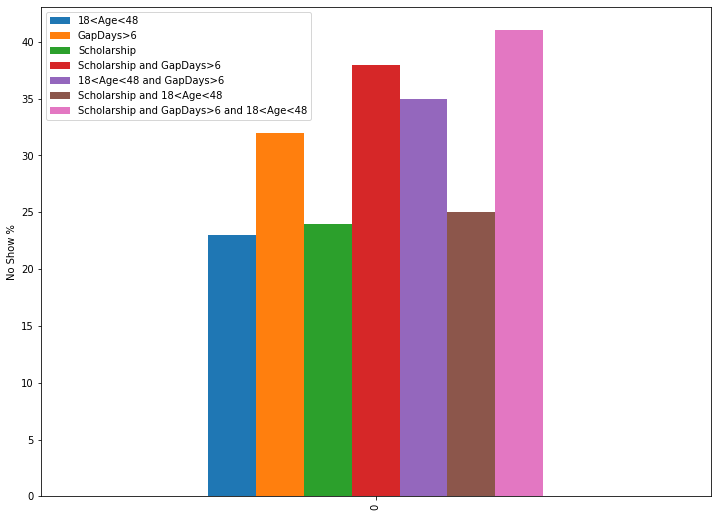

In [336]:
def get_prop(q):
    df_q = df.query(q)['NoShow']
    return round(df_q.sum()/df_q.count()*100)
    
outs = {
    
    "18<Age<48": get_prop('18<Age<48'),
    "GapDays>6": get_prop('6<GapDays'),
    "Scholarship": get_prop('Scholarship == 1'),
    "Scholarship and GapDays>6": get_prop('Scholarship == 1 and GapDays>6'),
    "18<Age<48 and GapDays>6": get_prop('18<Age<48 and GapDays>6'),
    "Scholarship and 18<Age<48": get_prop('Scholarship == 1 and 18<Age<48'),
    "Scholarship and GapDays>6 and 18<Age<48": get_prop('Scholarship==1 and GapDays>6 and 18<Age<48'),

    
}

pd.DataFrame.from_dict({k: [v] for k, v in outs.items()}).plot(kind='bar', figsize=(12,9))
plt.ylabel('No Show %')
plt.show()

#### Concluded factors for no show:
| 18 < Age < 48 | Gap Days > 6 | Scholarship | No show % |
|-----------------|---------------|-------------|-----------|
| ✅               | -             | -           | 23        |
| -               | ✅             | -           | 32        |
| -               | -             | ✅           | 24        |
| -               | ✅             | ✅           | 38        |
| ✅               | -             | ✅           | 25        |
| ✅               | ✅             |             | 35        |
| ✅               | ✅             | ✅           | 41        |